In [192]:
import numpy as np
import tsplib95
from python_tsp.distances.tsplib_distance import tsplib_distance_matrix

dataset = "data\pbl395.tsp"

cities = np.atleast_2d(list(tsplib95.load(dataset).node_coords.values()))
distance_matrix = tsplib_distance_matrix(dataset)


In [194]:
from sklearn.cluster import KMeans

N_CLUSTERS = 6

kmeans = KMeans(n_clusters=N_CLUSTERS).fit(cities)
print(kmeans.labels_)

LABELS = np.atleast_1d(kmeans.labels_)
CENTROIDS = np.atleast_2d(kmeans.cluster_centers_)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3
 4 4 4 4 4 4 4 4 3 4 4 4 3 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 4 4 4
 4 0 0 0 0 0 0 0 0 4 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 3 3 0
 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 3 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 3 3 3 3 3 3 3 0 0 0 0 3 0 3 3 3 3 3 1 1 3 3 3 1 1 1 1 1 1 3 1 3 3 3 1 1 1
 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 5 5 1 1 1 1 5
 5 5 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 5 5 2 2 2 2
 2 2 2 2 5 2 2 2 2 2 2 5 2 2 2 2 2 2 2 5 5 5 5 5 5 2 2 2 5 2 2 2 5 5 5 2 5
 2 2 2 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2]


In [195]:
import matplotlib.pyplot as plt

def plot_initial_clusters(points, kmeans, centroids):
    # reduced_data = PCA(n_components=2).fit_transform(data)
    # kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
    # kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.01  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X

    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )

    for idx, c in enumerate(centroids):
        plt.annotate(idx, c, fontsize = 30)

    plt.title(
        "K-means clustering\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

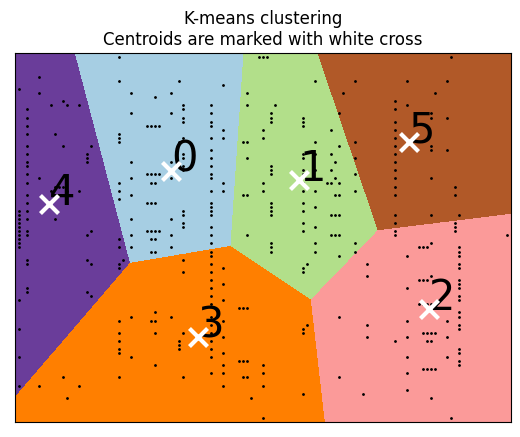

In [196]:
plot_initial_clusters(cities, kmeans, CENTROIDS)

In [197]:
from python_tsp.distances.euclidean_distance import euclidean_distance_matrix

subproblems = []

for i in range(N_CLUSTERS):
    problem = np.atleast_2d([city for idx, city in enumerate(cities) if kmeans.labels_[idx] == i])
    subproblems.append(problem)

CLUSTERS = []
for p in subproblems:
    distance_matrix = euclidean_distance_matrix(p)
    permutation, distance = solve_tsp_simulated_annealing(distance_matrix)
    print(distance)
    subset = np.atleast_2d([p[x] for x in permutation])
    print(subset)
    CLUSTERS.append(subset)


263.6215097272804
[[25 54]
 [25 56]
 [25 58]
 [28 59]
 [28 55]
 [32 53]
 [33 53]
 [34 53]
 [33 58]
 [34 58]
 [38 59]
 [38 63]
 [35 60]
 [34 60]
 [33 60]
 [32 60]
 [28 63]
 [25 68]
 [25 69]
 [25 70]
 [32 72]
 [33 72]
 [35 72]
 [34 72]
 [28 75]
 [28 80]
 [25 83]
 [25 89]
 [34 79]
 [38 75]
 [41 74]
 [41 76]
 [41 77]
 [38 80]
 [40 83]
 [51 82]
 [48 77]
 [48 75]
 [48 73]
 [48 72]
 [51 71]
 [51 69]
 [48 66]
 [48 69]
 [41 73]
 [41 69]
 [40 68]
 [41 65]
 [41 64]
 [41 62]
 [41 61]
 [48 64]
 [48 62]
 [48 60]
 [48 59]
 [51 58]
 [51 56]
 [48 56]
 [48 53]
 [48 52]
 [48 51]
 [48 50]
 [48 47]
 [48 45]
 [48 43]
 [41 47]
 [41 48]
 [41 50]
 [41 51]
 [38 49]
 [38 45]
 [38 42]
 [34 41]
 [33 41]
 [34 44]
 [35 46]
 [34 46]
 [33 46]
 [32 46]
 [33 44]
 [28 42]
 [28 45]
 [28 49]]
256.5197719034302
[[56 55]
 [57 45]
 [63 43]
 [63 41]
 [63 42]
 [71 46]
 [71 48]
 [74 47]
 [74 43]
 [74 41]
 [72 38]
 [71 37]
 [71 36]
 [80 40]
 [84 41]
 [84 43]
 [80 45]
 [79 45]
 [78 45]
 [80 50]
 [79 50]
 [78 50]
 [74 52]
 [71 51]


In [198]:
from math import dist

def plot_clusters(points, clusters, centroids):
    
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

    plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)

    for cluster in clusters:
        for i in range(len(cluster) - 1):
            plt.plot(cluster[[i, i+1], 0], cluster[[i, i+1], 1], c="k")
        plt.plot(cluster[[len(cluster) - 1, 0], 0], cluster[[len(cluster) - 1, 0], 1], c="k")

    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="k",
        zorder=10,
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

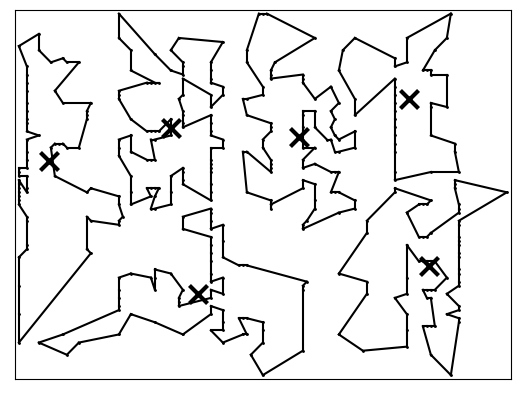

In [199]:
plot_clusters(cities, CLUSTERS, CENTROIDS)

In [200]:
def concatenate_clusters(cluster_a: np.ndarray, cluster_b: np.ndarray, centroid_a: np.ndarray, centroid_b: np.ndarray) -> (np.ndarray, np.ndarray):
    
    def get_closest_points(cluster, centroid):

        distances = []
        for point in cluster:
            distances.append((point, dist(point, centroid)))
        distances.sort(key=lambda x: x[1])
        p1 = distances[0][0]

        idx1 = [idx for idx, x in enumerate(cluster) if x[0] == p1[0] and x[1] == p1[1]][0]

        forward = idx1 + 1
        if forward >= len(cluster):
            forward = 0
        backward = idx1 - 1

        new_perm = list(cluster)

        if dist(cluster[forward], centroid) < dist(cluster[backward], centroid):
            p2 = cluster[forward]
            idx2 = forward
            new_perm = new_perm[idx1::-1] + new_perm[:idx2 - 1:-1]
        else:
            p2 = cluster[backward]
            idx2 = backward
            new_perm = new_perm[idx1:] + new_perm[:idx2 + 1]

        return p1, p2, np.atleast_2d(new_perm)
    
    p1, p2, new_cluster_a = get_closest_points(cluster_a, centroid_b)
    p3, p4, new_cluster_b = get_closest_points(cluster_b, centroid_a)
    
    def ccw(A,B,C):
        return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

    # Return true if line segments AB and CD intersect
    def intersect(A,B,C,D):
        return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)
    
    result = new_cluster_a

    if intersect(p1, p3, p2, p4):
        result = np.concatenate((result, new_cluster_b), axis=0)
    else:
        result = np.concatenate((result, np.flip(new_cluster_b, 0)), axis=0)

    def get_centeroid(arr):
        x = np.mean(arr[:, 0])
        y = np.mean(arr[:, 1])
        return np.atleast_1d([x, y])
    
    return result, get_centeroid(result)

In [201]:
def concatenate_all(clusters, centroids):

    t_clusters = list(clusters)
    t_centroids = list(centroids)

    while len(t_clusters) > 1:
        A = 0
        B = 1

        for i in range(1, len(t_centroids)):
            if (dist(t_centroids[i], t_centroids[A]) < dist(t_centroids[B], t_centroids[A])):
                B = i
        # print(A, B)

        new_cluster, new_centroid = concatenate_clusters(t_clusters[A], t_clusters[B], t_centroids[A], t_centroids[B])

        t_clusters = [np.atleast_2d(x) for idx, x in enumerate(t_clusters) if idx != A and idx != B]
        t_centroids = [x for idx, x in enumerate(t_centroids) if idx != A and idx != B]

        t_clusters.append(new_cluster)
        t_centroids.append(new_centroid)
        t_centroids = np.atleast_2d(t_centroids)

    return t_clusters[0], t_centroids[0]

In [202]:
result, centroid = concatenate_all(CLUSTERS, CENTROIDS)

In [203]:
def plot_path(points):
    
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1

    plt.plot(points[:, 0], points[:, 1], "k.", markersize=2)

    for i in range(len(points) - 1):
        plt.plot(points[[i, i+1], 0], points[[i, i+1], 1], c="k")
    plt.plot(points[[len(points) - 1, 0], 0], points[[len(points) - 1, 0], 1], c="k")

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

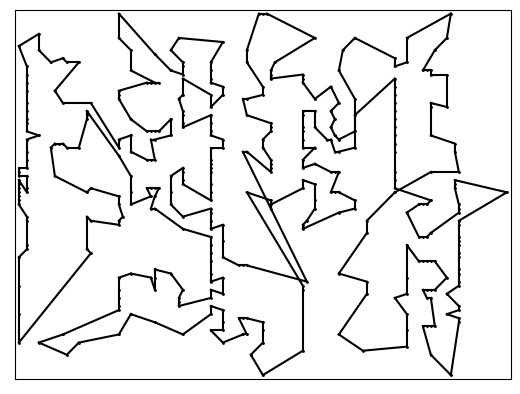

In [204]:
plot_path(result)

In [205]:
cost = 0
for i in range(len(result) - 1):
    cost += dist(result[i], result[i + 1])
cost += dist(result[-1], result[0])
print(cost)

1541.8347627590815


In [206]:
perm = [idx for idx, x in enumerate(result)]
perm

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [207]:
distance_matrix = euclidean_distance_matrix(result)

permutation, distance = solve_tsp_simulated_annealing(distance_matrix)

print(distance)

1504.2921126253514


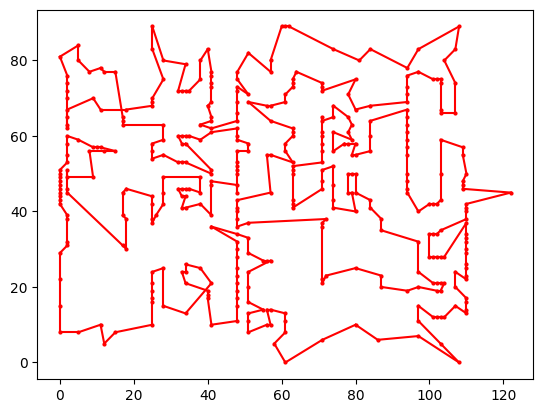

In [208]:
plt.plot(result[:, 0], result[:,1], 'or', markersize=2)

for i in range(len(permutation) - 1):
    plt.plot(result[[permutation[i], permutation[i+1]], 0], result[[permutation[i], permutation[i+1]], 1], c="r")

plt.plot(result[[permutation[len(result) - 1], 0], 0], result[[permutation[len(result) - 1], 0], 1], c="r")

plt.show()